# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Gathering

In [4]:
df=pd.read_csv("wine.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Wine,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,3.00,3.00,3.00,3.000000,3.00,3.00,3.00,3.00,3.00,3.00
Alcohol,14.23,13.20,13.16,14.37,13.24,14.20,14.39,14.06,14.83,13.86,...,13.58,13.40,12.20,12.770000,14.16,13.71,13.40,13.27,13.17,14.13
Malic.acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35,...,2.58,4.60,3.03,2.390000,2.51,5.65,3.91,4.28,2.59,4.10
Ash,2.43,2.14,2.67,2.50,2.87,2.45,2.45,2.61,2.17,2.27,...,2.69,2.86,2.32,2.280000,2.48,2.45,2.48,2.26,2.37,2.74
Acl,15.60,11.20,18.60,16.80,21.00,15.20,14.60,17.60,14.00,16.00,...,24.50,25.00,19.00,19.500000,20.00,20.50,23.00,20.00,20.00,24.50
Mg,127.00,100.00,101.00,113.00,118.00,112.00,96.00,121.00,97.00,98.00,...,105.00,112.00,96.00,86.000000,91.00,95.00,102.00,120.00,120.00,96.00
Phenols,2.80,2.65,2.80,3.85,2.80,3.27,2.50,2.60,2.80,2.98,...,1.55,1.98,1.25,1.390000,1.68,1.68,1.80,1.59,1.65,2.05
Flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15,...,0.84,0.96,0.49,0.510000,0.70,0.61,0.75,0.69,0.68,0.76
Nonflavanoid.phenols,0.28,0.26,0.30,0.24,0.39,0.34,0.30,0.31,0.29,0.22,...,0.39,0.27,0.40,0.480000,0.44,0.52,0.43,0.43,0.53,0.56
Proanth,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85,...,1.54,1.11,0.73,0.640000,1.24,1.06,1.41,1.35,1.46,1.35


# 1. Problem Statement

In [3]:
# To predict Wine qualtity type by using various independent variables: 1)Alcohol,2)Malic.acid,3)Ash,4)Acl ...etc

In [5]:
df.isna().sum()# check null Values 

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
df.info() # understand the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<AxesSubplot:>

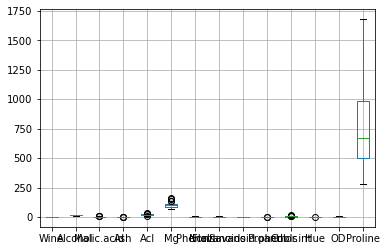

In [7]:
df.boxplot()# check outlier its Clean Data Set

In [8]:
df["Wine"].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [10]:
df["Proline"].value_counts()

680     5
520     5
625     4
750     4
630     4
       ..
1265    1
1260    1
1080    1
885     1
840     1
Name: Proline, Length: 121, dtype: int64

<AxesSubplot:xlabel='Flavanoids'>

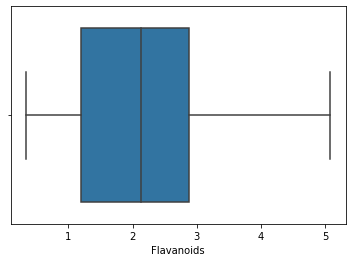

In [9]:
sns.boxplot(df["Flavanoids"])

In [10]:
df["Proline"].nunique()

121

# Train Model

In [11]:
x=df.drop("Wine",axis=1)
y=df["Wine"]


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=10)

In [13]:
y_train.value_counts()

2    53
1    44
3    36
Name: Wine, dtype: int64

In [14]:
y_test.value_counts()

2    18
1    15
3    12
Name: Wine, dtype: int64

# Instantiating Logestic Regression Model

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
logestic_reg_model=LogisticRegression(multi_class="ovr")
logestic_reg_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

# Evaluation

In [18]:
# Evaluation on testing DataSet
y_pred=logestic_reg_model.predict(x_test)

confusion_matx=confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",confusion_matx)

acc_score=accuracy_score(y_test,y_pred)
print("accuracy_score:\n",acc_score)

clf_report=classification_report(y_test,y_pred)
print("classification_report:\n",clf_report)

confusion_matrix:
 [[14  1  0]
 [ 1 16  1]
 [ 0  0 12]]
accuracy_score:
 0.9333333333333333
classification_report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.94      0.89      0.91        18
           3       0.92      1.00      0.96        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [19]:
# Evaluation on training DataSet
y_pred_train=logestic_reg_model.predict(x_train)

confusion_matx=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix:\n",confusion_matx)

acc_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score:\n",acc_score)

clf_report=classification_report(y_train,y_pred_train)
print("classification_report:\n",clf_report)

confusion_matrix:
 [[43  1  0]
 [ 0 52  1]
 [ 0  1 35]]
accuracy_score:
 0.9774436090225563
classification_report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        44
           2       0.96      0.98      0.97        53
           3       0.97      0.97      0.97        36

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133



# Knn KNeighborsClassifier


##  Scaling 1. Normalization¶

In [20]:
x

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
normal_scaler=MinMaxScaler()
normal_scaler.fit(x)
normalized_array=normal_scaler.transform(x)
x_df=pd.DataFrame(normalized_array,columns=x.columns)
x_df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# By using Normalization

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y,test_size=0.2,random_state=20,stratify=y)

In [23]:
knn_regresor_model=KNeighborsClassifier()
knn_regresor_model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = knn_regresor_model.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[12  0  0]
 [ 2 12  0]
 [ 0  0 10]]
**********************************************************************
Accuracy Score : 0.9444444444444444
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

**********************************************************************


In [25]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = knn_regresor_model.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[47  0  0]
 [ 0 55  2]
 [ 0  1 37]]
**********************************************************************
Accuracy Score : 0.9788732394366197
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       0.98      0.96      0.97        57
           3       0.95      0.97      0.96        38

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142

**********************************************************************


# Hyperparameters

In [26]:
knn_clf=KNeighborsClassifier(p=2,n_neighbors=2)
hyperparameters={"n_neighbors":np.arange(2,20),
                "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=2)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_params_

{'n_neighbors': 5, 'p': 1}

# KNN after Hyperparameter Tuning

In [27]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)


# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[12  0  0]
 [ 2 12  0]
 [ 0  0 10]]
Accuracy : 0.9444444444444444
Classification Report :
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [28]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[47  0  0]
 [ 2 55  0]
 [ 0  1 37]]
Accuracy : 0.9788732394366197
Classification Report :
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        47
           2       0.98      0.96      0.97        57
           3       1.00      0.97      0.99        38

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



# Descion Tree¶

In [29]:
# Train Model
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[12  0  0]
 [ 3 11  0]
 [ 0  0 10]]
**************************************************
Accuracy Score is : 0.9166666666666666
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       1.00      0.79      0.88        14
           3       1.00      1.00      1.00        10

    accuracy                           0.92        36
   macro avg       0.93      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



In [31]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



# Decision Tree After Hyper parameter Tuning

In [32]:
dt_clf = DecisionTreeClassifier()

hyperparameters = {
                    "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split" : np.arange(2,20),
                    "min_samples_leaf": np.arange(2,10)
                    }

gscv_dt_model = GridSearchCV(dt_clf,hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [33]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [34]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[12  0  0]
 [ 1 11  2]
 [ 0  0 10]]
**************************************************
Accuracy Score is : 0.9166666666666666
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.79      0.88        14
           3       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



In [33]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[44  2  1]
 [ 0 56  1]
 [ 0  1 37]]
**************************************************
Accuracy Score is : 0.9647887323943662
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        47
           2       0.95      0.98      0.97        57
           3       0.95      0.97      0.96        38

    accuracy                           0.96       142
   macro avg       0.97      0.96      0.96       142
weighted avg       0.97      0.96      0.96       142



In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200,160))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1","2"],filled=True)
plt.savefig("DecionTree233.jpg")

# Random Forest

In [36]:
rf_clr=RandomForestClassifier(random_state=20)
rf_clr.fit(x_train,y_train)

RandomForestClassifier(random_state=20)

In [37]:
# Testing Data Accuracy
y_pred = rf_clr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
**************************************************
Accuracy Score is : 0.9722222222222222
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [60]:
# Training Data Accuracy
y_pred_train = rf_clr.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



# Random Forest with Hyperparameter tuning

In [38]:
# Random Forest with Hyperparameter tuning
rf_clr1=RandomForestClassifier(random_state=20)
Hyper={"n_estimators":np.arange(0,150),
    "criterion":['gini',"entropy"],
    "max_depth":np.arange(0,15),
    "min_samples_split":np.arange(0,15),
    "min_samples_leaf":np.arange(5,35),
    "max_features":['auto'],
    }
rscv_rf_clr=RandomizedSearchCV(rf_clr1,Hyper,cv=5)
rscv_rf_clr.fit(x_train,y_train)
rscv_rf_clr.best_estimator_

RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=5,
                       n_estimators=86, random_state=20)

In [39]:
rf_clr1=RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=8,
                       n_estimators=86, random_state=20,oob_score=True,bootstrap=True)
rf_clr1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=8,
                       n_estimators=86, oob_score=True, random_state=20)

In [40]:
# Testing Data Accuracy
y_pred = rf_clr1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
**************************************************
Accuracy Score is : 0.9722222222222222
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [41]:
# Training Data Accuracy
y_pred_train = rf_clr1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[47  0  0]
 [ 1 54  2]
 [ 0  0 38]]
**************************************************
Accuracy Score is : 0.9788732394366197
**************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        47
           2       1.00      0.95      0.97        57
           3       0.95      1.00      0.97        38

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



# pickle file Creation 

In [42]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(rf_clr1,f)

# Training for model indivisal result 

In [43]:
x_train.tail(1).T

,159
Alcohol,0.644737
Malic.acid,0.183794
Ash,0.684492
Acl,0.613402
Mg,0.206522
Phenols,0.558621
Flavanoids,0.160338
Nonflavanoid.phenols,0.735849
Proanth,0.593060
Color.int,0.893345


# Function to check wine types

In [44]:
Alcohol=1.000000
Malic_acid=0.177866
Ash=0.433155
Acl=0.175258
Mg=0.293478
Phenols=0.627586
Flavanoids=0.556962
Nonflavanoid_phenols=0.301887
Proanth=0.495268
Color_int=0.334471
Hue=0.487805
OD=0.578755
Proline=0.547076
array = np.array([Alcohol, Malic_acid, Ash, Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline],ndmin = 2)
predicted_Wine_type = rf_clr1.predict(array)
predicted_Wine_type[0]


1

In [ ]:
#Wine Data  Dtatset
# logestic Regression
Testing Accuracy=93.33
Training Aaccuracy=97.74
#knn with normalization 
Testing Accuracy=94.45
Training Aaccuracy=97.88
#knn with normalization with hyperparameter
Testing Accuracy=94.44
Training Aaccuracy=97.88
#Decision Tree 
Testing Accuracy=91.66
Training Aaccuracy=100.00
# Descision tree with hyperparameters
Testing Accuracy=91.68
Training Aaccuracy=96.478
# Random Forest
Testing Accuracy=97.22
Training Aaccuracy=100
# Random Forest with hyperparameters
Testing Accuracy=97.22
Training Aaccuracy=97.88

# pickle file Creation